***
# 3.1 First Order Syntax for Bird 26
### JX, 03/15/2022
***
    Bird26:
    LS110395.9.28.2017PalmRagonesi.WAV
    
***

In [1]:
indv = 'Bird26'
iterations = 100

In [2]:
## Load up Note Dataframe

import pandas as pd
from pathlib2 import Path

from butcherbird.utils.paths import DATA_DIR

SAVE_LOC = 'interim/fine_labels/butcherbird_note_df_'+indv+'_fine.pickle'
SAVE_LOC = DATA_DIR / SAVE_LOC

note_df = pd.read_pickle(SAVE_LOC)

## Make a copy of recursively generated labels
#note_df['lasso_labels'] = note_df['recur_labels_id']

note_df

,phrase_nb,phrase_strt,phrase_end,phrase_len,note_cnt,note_nb,note_strt,note_end,note_len,indv,indvi,key,audio,rate,spectrogram,umap,hdbscan_labels,recur_labels,recur_labels_id,lasso_labels
0,0,2.530000,3.108940,0.578940,4,0,2.530000,2.565308,0.035308,Bird26,0,LS110395.9.28.2017PalmRagonesi_dn,"[0.0, 1.046653124410034e-05, 2.781446748131873...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[-7.5537066, 8.209083]",21,21|0|1.0|1.0|0.0|nan|nan|nan|nan,154,4
1,0,2.530000,3.108940,0.578940,4,1,2.582859,2.646042,0.063184,Bird26,0,LS110395.9.28.2017PalmRagonesi_dn,"[-0.0, -5.34641467372343e-06, -1.1688967129128...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[-0.6834063, 9.239816]",11,11|0|0.0|1.0|0.0|1.0|0.0|0.0|nan,14,2
2,0,2.530000,3.108940,0.578940,4,2,2.754858,2.877196,0.122338,Bird26,0,LS110395.9.28.2017PalmRagonesi_dn,"[0.0, 2.4410663172602654e-05, 5.92200898084064...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[-1.5902307, -12.39612]",0,0|0|0.0|0.0|1.0|0.0|nan|nan|nan,1,0
3,0,2.530000,3.108940,0.578940,4,3,2.942109,3.108940,0.166831,Bird26,0,LS110395.9.28.2017PalmRagonesi_dn,"[-0.0, -0.00015404379157812003, -0.00030952889...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[7.0395265, 3.0541244]",26,26|1|1.0|0.0|nan|nan|nan|nan|nan,206,19
4,1,7.660000,9.269842,1.609842,6,0,7.660000,7.802573,0.142573,Bird26,0,LS110395.9.28.2017PalmRagonesi_dn,"[0.0, 5.444124866051962e-05, 0.000182190384940...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[5.1442027, -3.2366111]",12,12|1|0.0|1.0|0.0|nan|nan|nan|nan,37,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,1426,7451.938961,7454.270021,2.331060,11,6,7453.230000,7453.347846,0.117846,Bird26,0,LS110395.9.28.2017PalmRagonesi_dn,"[0.0, 0.00020218813079315542, 0.00039304040322...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[5.835227, 3.594297]",25,25|1|1.0|1.0|0.0|0.0|nan|nan|nan,195,17
10862,1426,7451.938961,7454.270021,2.331060,11,7,7453.430000,7453.582862,0.152862,Bird26,0,LS110395.9.28.2017PalmRagonesi_dn,"[-0.0, -6.027892231941223e-05, -0.000147847971...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[5.1574388, 3.9381824]",25,25|0|0.0|0.0|nan|nan|nan|nan|nan,188,11
10863,1426,7451.938961,7454.270021,2.331060,11,8,7453.582862,7453.644792,0.061930,Bird26,0,LS110395.9.28.2017PalmRagonesi_dn,"[-0.0, -0.0007704722401279731, -0.002082758701...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[-0.96411866, 1.086623]",19,19|0|0.0|1.0|1.0|0.0|nan|nan|nan,118,9
10864,1426,7451.938961,7454.270021,2.331060,11,9,7453.786119,7453.917918,0.131800,Bird26,0,LS110395.9.28.2017PalmRagonesi_dn,"[-0.0, -2.3817842366836413e-06, -8.17539332897...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[2.2781262, -6.882173]",9,9|0|0.0|1.0|0.0|nan|nan|nan|nan,234,27


## Normalized Block Entropy of Different Models

In [3]:
import random
import numpy as np
from tqdm.autonotebook import tqdm
import butcherbird.sequential as sequential

/tmp/ipykernel_38623/2375031118.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


### Random Model

In [4]:
## make 100 sequences
rand_seqs = []

for index in tqdm(np.arange(0, iterations)):
    indv_seq = []

    unique_states = sequential.get_seq_states(note_df['lasso_labels'])[0]
    p_states = sequential.uniform_p_dist(unique_states)

    for note in note_df['lasso_labels']:
        indv_seq.append(random.choices(unique_states, p_states)[0])

    rand_seqs.append(indv_seq)

  0%|          | 0/100 [00:00<?, ?it/s]

In [5]:
## get 20 normalized entropy values for all 100 sequences
rand_ent = []

for seq in tqdm(rand_seqs):
    rand_ent.append(sequential.seq_block_entropy(seq, 'Random Song', 21))

  0%|          | 0/100 [00:00<?, ?it/s]

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

In [6]:
rand_df = pd.concat(rand_ent)

In [7]:
rand_df

,song_type,song,block_size,unique_states,p_states,normalized_block_entropy
0,Random Song,"[2, 25, 5, 18, 5, 36, 6, 31, 9, 5, 17, 2, 16, ...",1,"[0, 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,...","[0.027240935026688753, 0.027240935026688753, 0...",0.999449
0,Random Song,"[2|25, 25|5, 5|18, 18|5, 5|36, 36|6, 6|31, 31|...",2,"[0|0, 0|1, 0|10, 0|11, 0|12, 0|13, 0|14, 0|15,...","[0.0010124252185918085, 0.0004601932811780948,...",0.990788
0,Random Song,"[2|25|5, 25|5|18, 5|18|5, 18|5|36, 5|36|6, 36|...",3,"[0|0|0, 0|0|1, 0|0|10, 0|0|19, 0|0|20, 0|0|21,...","[9.204712812960235e-05, 0.0001840942562592047,...",0.995911
0,Random Song,"[2|25|5|18, 25|5|18|5, 5|18|5|36, 18|5|36|6, 5...",4,"[0|0|0|28, 0|0|10|32, 0|0|19|15, 0|0|1|26, 0|0...","[9.205560158335634e-05, 9.205560158335634e-05,...",0.999845
0,Random Song,"[2|25|5|18|5, 25|5|18|5|36, 5|18|5|36|6, 18|5|...",5,"[0|0|0|28|4, 0|0|10|32|17, 0|0|19|15|8, 0|0|1|...","[9.206407659731172e-05, 9.206407659731172e-05,...",0.999996
...,...,...,...,...,...,...
0,Random Song,"[26|7|14|3|5|31|3|23|23|34|34|8|28|8|34|35, 7|...",16,"[0|0|13|8|9|30|8|17|23|24|28|0|21|29|22|29, 0|...","[9.21574048474795e-05, 9.21574048474795e-05, 9...",1.000000
0,Random Song,"[26|7|14|3|5|31|3|23|23|34|34|8|28|8|34|35|33,...",17,"[0|0|13|8|9|30|8|17|23|24|28|0|21|29|22|29|3, ...","[9.216589861751152e-05, 9.216589861751152e-05,...",1.000000
0,Random Song,[26|7|14|3|5|31|3|23|23|34|34|8|28|8|34|35|33|...,18,[0|0|13|8|9|30|8|17|23|24|28|0|21|29|22|29|3|3...,"[9.217439395335975e-05, 9.217439395335975e-05,...",1.000000
0,Random Song,[26|7|14|3|5|31|3|23|23|34|34|8|28|8|34|35|33|...,19,[0|0|13|8|9|30|8|17|23|24|28|0|21|29|22|29|3|3...,"[9.218289085545723e-05, 9.218289085545723e-05,...",1.000000


In [8]:
len(rand_df['p_states'].values[2])

9767

### Zero-order model

In [9]:
## make 100 sequences
zero_seqs = []

for index in tqdm(np.arange(0, iterations)):
    zero_seqs.append(sequential.syn_seq_gen(note_df, label = 'lasso_labels', order = 'zero'))

  0%|          | 0/100 [00:00<?, ?it/s]

In [10]:
## get 20 normalized entropy values for all 100 sequences
zero_ent = []

for seq in tqdm(zero_seqs):
    zero_ent.append(sequential.seq_block_entropy(seq, 'Zero-Order Song', 21))

  0%|          | 0/100 [00:00<?, ?it/s]

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

In [11]:
zero_df = pd.concat(zero_ent)

In [12]:
zero_df

,song_type,song,block_size,unique_states,p_states,normalized_block_entropy
0,Zero-Order Song,"[36, 32, 19, 8, 9, 10, 9, 9, 28, 8, 25, 0, 6, ...",1,"[0, 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,...","[0.03294680655254924, 0.009018958218295601, 0....",0.938437
0,Zero-Order Song,"[36|32, 32|19, 19|8, 8|9, 9|10, 10|9, 9|9, 9|2...",2,"[0|0, 0|1, 0|10, 0|11, 0|12, 0|13, 0|14, 0|15,...","[0.0010124252185918085, 0.00018407731247123792...",0.947627
0,Zero-Order Song,"[36|32|19, 32|19|8, 19|8|9, 8|9|10, 9|10|9, 10...",3,"[0|0|0, 0|0|10, 0|0|13, 0|0|19, 0|0|2, 0|0|24,...","[9.204712812960235e-05, 9.204712812960235e-05,...",0.989774
0,Zero-Order Song,"[36|32|19|8, 32|19|8|9, 19|8|9|10, 8|9|10|9, 9...",4,"[0|0|0|24, 0|0|10|2, 0|0|13|2, 0|0|13|27, 0|0|...","[9.205560158335634e-05, 9.205560158335634e-05,...",0.999572
0,Zero-Order Song,"[36|32|19|8|9, 32|19|8|9|10, 19|8|9|10|9, 8|9|...",5,"[0|0|0|24|23, 0|0|10|2|2, 0|0|13|27|17, 0|0|13...","[9.206407659731172e-05, 9.206407659731172e-05,...",0.999992
...,...,...,...,...,...,...
0,Zero-Order Song,"[2|26|14|4|23|9|28|16|27|7|34|27|13|32|9|28, 2...",16,"[0|0|13|7|15|14|21|34|34|2|16|32|16|25|24|28, ...","[9.21574048474795e-05, 9.21574048474795e-05, 9...",1.000000
0,Zero-Order Song,"[2|26|14|4|23|9|28|16|27|7|34|27|13|32|9|28|0,...",17,[0|0|13|7|15|14|21|34|34|2|16|32|16|25|24|28|3...,"[9.216589861751152e-05, 9.216589861751152e-05,...",1.000000
0,Zero-Order Song,[2|26|14|4|23|9|28|16|27|7|34|27|13|32|9|28|0|...,18,[0|0|13|7|15|14|21|34|34|2|16|32|16|25|24|28|3...,"[9.217439395335975e-05, 9.217439395335975e-05,...",1.000000
0,Zero-Order Song,[2|26|14|4|23|9|28|16|27|7|34|27|13|32|9|28|0|...,19,[0|0|13|7|15|14|21|34|34|2|16|32|16|25|24|28|3...,"[9.218289085545723e-05, 9.218289085545723e-05,...",1.000000


## First-Order Model

In [13]:
## make 100 sequences
first_seqs = []

for index in tqdm(np.arange(0, iterations)):
    first_seqs.append(sequential.syn_seq_gen(note_df, label = 'lasso_labels', order = 'first'))

  0%|          | 0/100 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

In [14]:
## get 20 normalized entropy values for all 100 sequences
first_ent = []

for seq in tqdm(first_seqs):
    first_ent.append(sequential.seq_block_entropy(seq, 'First-Order Song', 21))

  0%|          | 0/100 [00:00<?, ?it/s]

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

In [15]:
first_df = pd.concat(first_ent)

In [16]:
first_df

,song_type,song,block_size,unique_states,p_states,normalized_block_entropy
0,First-Order Song,"[24, 32, 10, 16, 1, 15, 33, 34, 6, 20, 0, 19, ...",1,"[0, 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,...","[0.0357077121295785, 0.01085956193631511, 0.03...",0.937093
0,First-Order Song,"[24|32, 32|10, 10|16, 16|1, 1|15, 15|33, 33|34...",2,"[0|10, 0|15, 0|18, 0|19, 0|5, 0|7, 0|8, 10|10,...","[0.00018407731247123792, 9.203865623561896e-05...",0.751361
0,First-Order Song,"[24|32|10, 32|10|16, 10|16|1, 16|1|15, 1|15|33...",3,"[0|10|16, 0|15|9, 0|18|28, 0|18|35, 0|18|4, 0|...","[0.0001840942562592047, 9.204712812960235e-05,...",0.775936
0,First-Order Song,"[24|32|10|16, 32|10|16|1, 10|16|1|15, 16|1|15|...",4,"[0|10|16|17, 0|10|16|18, 0|15|9|33, 0|18|28|10...","[9.205560158335634e-05, 9.205560158335634e-05,...",0.820140
0,First-Order Song,"[24|32|10|16|1, 32|10|16|1|15, 10|16|1|15|33, ...",5,"[0|10|16|17|2, 0|10|16|18|36, 0|15|9|33|15, 0|...","[9.206407659731172e-05, 9.206407659731172e-05,...",0.865045
...,...,...,...,...,...,...
0,First-Order Song,"[13|28|15|9|23|4|2|21|26|27|13|28|15|34|6|1, 2...",16,"[0|18|4|2|0|19|14|14|15|33|34|6|20|4|2|21, 0|1...","[9.21574048474795e-05, 9.21574048474795e-05, 9...",0.999333
0,First-Order Song,[13|28|15|9|23|4|2|21|26|27|13|28|15|34|6|1|15...,17,"[0|18|4|2|0|19|14|14|15|33|34|6|20|4|2|21|15, ...","[9.216589861751152e-05, 9.216589861751152e-05,...",0.999567
0,First-Order Song,[13|28|15|9|23|4|2|21|26|27|13|28|15|34|6|1|15...,18,[0|18|4|2|0|19|14|14|15|33|34|6|20|4|2|21|15|3...,"[9.217439395335975e-05, 9.217439395335975e-05,...",0.999729
0,First-Order Song,[13|28|15|9|23|4|2|21|26|27|13|28|15|34|6|1|15...,19,[0|18|4|2|0|19|14|14|15|33|34|6|20|4|2|21|15|3...,"[9.218289085545723e-05, 9.218289085545723e-05,...",0.999837


## Second-Order model

In [17]:
## make 100 sequences
second_seqs = []

for index in tqdm(np.arange(0, iterations)):
    second_seqs.append(sequential.syn_seq_gen(note_df, label = 'lasso_labels', order = 'second'))

  0%|          | 0/100 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

In [18]:
## get 20 normalized entropy values for all 100 sequences
second_ent = []

for seq in tqdm(second_seqs):
    second_ent.append(sequential.seq_block_entropy(seq, 'Second-Order Song', 21))

  0%|          | 0/100 [00:00<?, ?it/s]

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

In [19]:
second_df = pd.concat(second_ent)

In [20]:
second_df

,song_type,song,block_size,unique_states,p_states,normalized_block_entropy
0,Second-Order Song,"[32, 10, 16, 18, 4, 2, 21, 15, 9, 23, 14, 14, ...",1,"[0, 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,...","[0.034051168783360945, 0.009755199705503405, 0...",0.937765
0,Second-Order Song,"[32|10, 10|16, 16|18, 18|4, 4|2, 2|21, 21|15, ...",2,"[0|10, 0|15, 0|18, 0|19, 0|4, 0|5, 0|7, 0|8, 1...","[0.00018407731247123792, 0.0004601932811780948...",0.748906
0,Second-Order Song,"[32|10|16, 10|16|18, 16|18|4, 18|4|2, 4|2|21, ...",3,"[0|10|17, 0|15|17, 0|15|4, 0|18|22, 0|19|0, 0|...","[0.0001840942562592047, 0.0001840942562592047,...",0.773023
0,Second-Order Song,"[32|10|16|18, 10|16|18|4, 16|18|4|2, 18|4|2|21...",4,"[0|10|17|18, 0|10|17|2, 0|15|17|22, 0|15|4|2, ...","[9.205560158335634e-05, 9.205560158335634e-05,...",0.803074
0,Second-Order Song,"[32|10|16|18|4, 10|16|18|4|2, 16|18|4|2|21, 18...",5,"[0|10|17|18|4, 0|10|17|2|25, 0|15|17|22|5, 0|1...","[9.206407659731172e-05, 9.206407659731172e-05,...",0.836620
...,...,...,...,...,...,...
0,Second-Order Song,"[33|34|6|20|4|2|21|26|27|13|28|15|9|33|34|6, 3...",16,"[0|15|17|22|5|15|9|33|34|6|20|4|2|0|19|22, 0|1...","[9.21574048474795e-05, 9.21574048474795e-05, 9...",0.997990
0,Second-Order Song,[33|34|6|20|4|2|21|26|27|13|28|15|9|33|34|6|20...,17,"[0|15|17|22|5|15|9|33|34|6|20|4|2|0|19|22|5, 0...","[9.216589861751152e-05, 9.216589861751152e-05,...",0.998858
0,Second-Order Song,[33|34|6|20|4|2|21|26|27|13|28|15|9|33|34|6|20...,18,[0|15|17|22|5|15|9|33|34|6|20|4|2|0|19|22|5|17...,"[9.217439395335975e-05, 9.217439395335975e-05,...",0.999390
0,Second-Order Song,[33|34|6|20|4|2|21|26|27|13|28|15|9|33|34|6|20...,19,[0|15|17|22|5|15|9|33|34|6|20|4|2|0|19|22|5|17...,"[9.218289085545723e-05, 9.218289085545723e-05,...",0.999664


### True Song

In [21]:
true_df = sequential.seq_block_entropy(note_df['lasso_labels'], 'True Song', 21)

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

## Add everything together

In [22]:
block_entropy_vis = pd.concat([true_df, rand_df, zero_df, first_df, second_df])

In [23]:
block_entropy_vis = block_entropy_vis.reset_index()

## Plot all models with confidence intervals

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

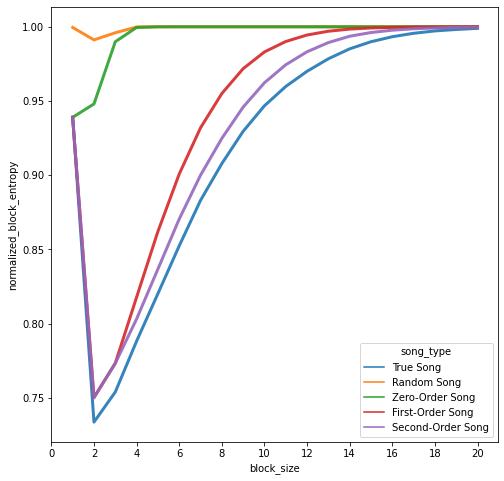

In [25]:
fig, ax = plt.subplots(figsize = (8, 8))

sns.lineplot(data = block_entropy_vis, x = 'block_size', y = 'normalized_block_entropy', hue = 'song_type', lw = 3, err_style="bars", ci=0.95, alpha = 0.9)

sns.set_style("white")
palette = sns.color_palette("mako_r", 6)

ax.set_xticks(np.arange(0, 21, step = 2))

plt.savefig('long_range.svg')

plt.show()

## find mean of all song types

In [27]:
import numpy as np
import scipy.stats

## a standard calculation for confidence interval
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [31]:
def mean_normalized_entropy(ent):
    #find mean and confidence intervals of note sequence normalized entropies
    sample_means = []
    for sample in ent:
        sample_means.append(np.mean(sample['normalized_block_entropy']))
        
    return mean_confidence_interval(sample_means)

In [32]:
mean_normalized_entropy(rand_ent)

(0.9993267977160041, 0.9993222602632157, 0.9993313351687925)

In [33]:
mean_normalized_entropy(zero_ent)

(0.9938216832203277, 0.9937922809245281, 0.9938510855161273)

In [34]:
mean_normalized_entropy(first_ent)

(0.9431576960528238, 0.9429216275914173, 0.9433937645142304)

In [35]:
mean_normalized_entropy(second_ent)

(0.9318335320411896, 0.9315651592852346, 0.9321019047971445)

In [38]:
mean_normalized_entropy([true_df])

/home/AD/j8xing/anaconda3/envs/pbb/lib/python3.10/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/AD/j8xing/anaconda3/envs/pbb/lib/python3.10/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(0.9210537780450118, nan, nan)